In [2]:
## Getting MNIST data 

from six.moves import urllib
import seaborn as sns

from sklearn.decomposition import PCA
from scipy.io import loadmat

import numpy as np


In [3]:
from tensorflow.keras.datasets import mnist

(inp_tr, tar_tr), (inp_va, tar_va) = mnist.load_data()
inp_tr= inp_tr/255.
inp_va= inp_va/255.
inp_tr = np.reshape(inp_tr,(-1,784))
inp_va = np.reshape(inp_va,(-1,784))

inp= np.concatenate((inp_tr,inp_va))
tar= np.concatenate((tar_tr,tar_va))

print (np.shape(inp),np.shape(tar))

(70000, 784) (70000,)


In [4]:
## Splitting the data into two sets: train and test (95%) because t_SNE is slow!


from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split( inp, tar, test_size=.95, random_state=0)

In [5]:
print (np.shape(train_img),np.shape(test_img))

(3500, 784) (66500, 784)


<Figure size 640x480 with 0 Axes>

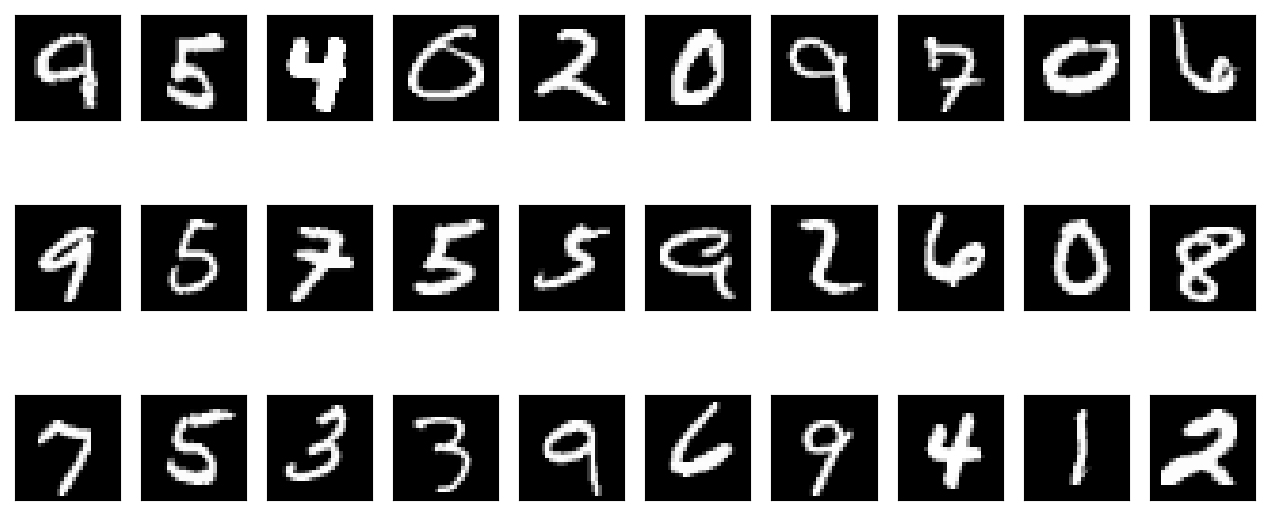

In [6]:
## just for seeing some images (digits)

%matplotlib inline
import matplotlib.pyplot as plt

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for k1 in range(0,30):
    ax = fig.add_subplot(3,10,k1+1 )
    ax.matshow(train_img[k1].reshape((28,28)).astype(float))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [7]:
 ##Choose the percentage or the first components of PCA

#pca = PCA(.95)

n_components=100

pca=PCA(n_components=n_components)
pca.fit(train_img)
train_img_pca = pca.transform(train_img)
test_img_pca = pca.transform(test_img)



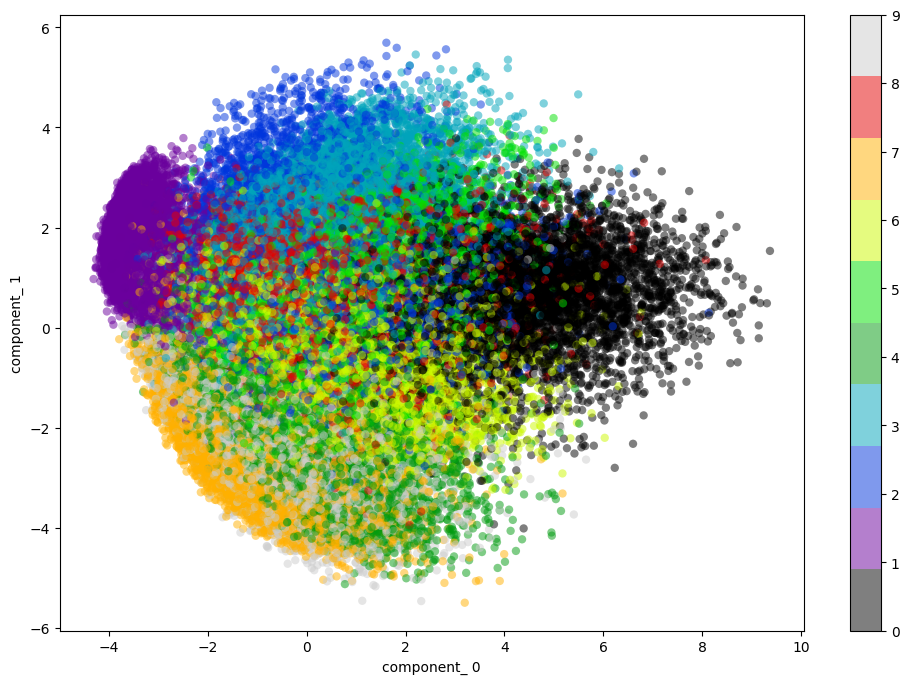

In [8]:
##  see the distribution of the examples on the some selected components

comX=0
comY=1



plt.figure(figsize=(12,8))
plt.scatter(test_img_pca[:,comX], test_img_pca[:,comY],
            c=test_lbl, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.xlabel('component_ '+ str(comX))
plt.ylabel('component_ '+str(comY))
plt.colorbar();



In [9]:
## Run t_SNE (with  dimensions=2 i.e., a new 2-d space) 

import time

from sklearn.manifold import TSNE



time_start = time.time()
tsne = TSNE(n_components=2)
tsne.fit(train_img)



# tsne_results = tsne.fit_transform(.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

print ('Done')

C:\Users\hteim\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\hteim\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE done! Time elapsed: 6.392697095870972 seconds
Done


In [10]:
tsne_results_tr= tsne.fit_transform(train_img)


C:\Users\hteim\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\hteim\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


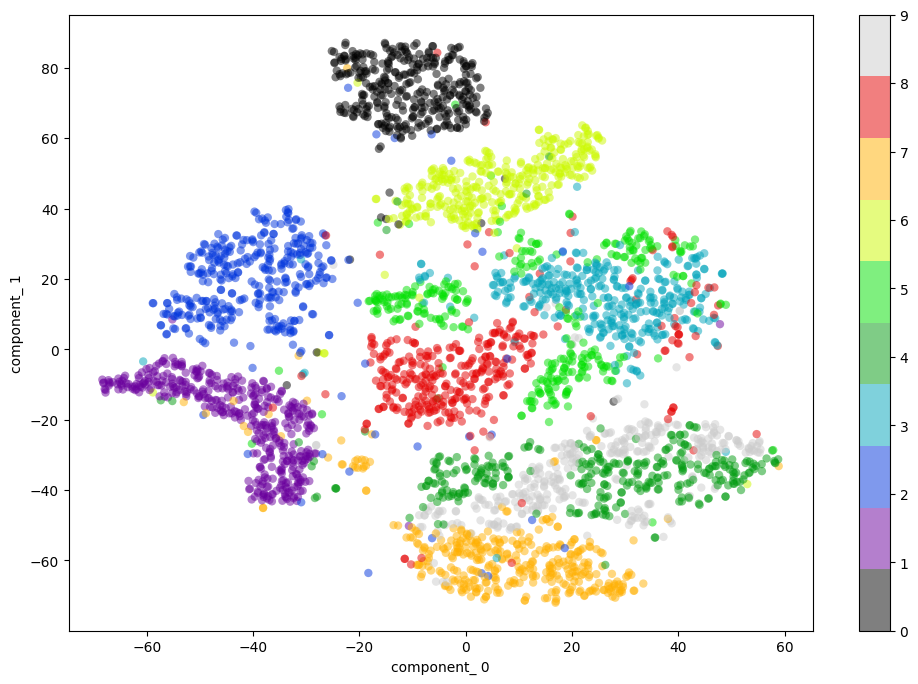

In [11]:
## see the examples on the selected 2-dim space 

comX=0
comY=1



plt.figure(figsize=(12,8))
plt.scatter(tsne_results_tr[:,comX], tsne_results_tr[:,comY],
            c=train_lbl, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.xlabel('component_ '+ str(comX))
plt.ylabel('component_ '+str(comY))
plt.colorbar();







# Class activity
1- Change PCA values and  see the result
